In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# data partition
from sklearn.model_selection import train_test_split

#filter methods
# spearman 
# chi-square
import scipy.stats as stats
from scipy.stats import chi2_contingency

#wrapper methods
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_selection import RFE


# embedded methods
from sklearn.linear_model import LassoCV

Columns
    `Claim Identifier` - Unique identifier for each claim, assigned by WCB. <br>
    `Accident Date` - Injury date of the claim.<br>
    `Alternative Dispute Resolution` - Adjudication processes external to the Board.<br>
    `Assembly Date` - The date the claim was first assembled.<br>
    `Attorney/ Representative` - Is the claim being represented by an Attorney? <br>
    `Average Weekly Wage` - "The wage used to calculate workers’ compensation, disability, or an Paid Leave wage replacement benefits." <br>
    `Birth Year` - The reported year of birth of the injured worker.<br>
    `C-2 Date` - Date of receipt of the Employer's Report of Work-Related Injury/Illness or equivalent (formerly Form C-2).<br>
    `C-3 Date` - Date Form C-3 (Employee Claim Form) was received.<br>
    `Carrier Name` - Name of primary insurance provider responsible for providing workers’ compensation coverage to the injured worker’s employer.<br>
    `Carrier Type` - Type of primary insurance provider responsible for providing workers’ compensation coverage.<br>
    `County of Injury` - Name of the New York County where the injury occurred.<br>
    `COVID-19 Indicator` - Indication that the claim may be associated with COVID-19.<br>
    `District Name` - Name of the WCB district office that oversees claims for that region or area of the state.<br>
    `First Hearing Date` - Date the first hearing was held on a claim at a WCB hearing location. A blank date means the claim has not yet had a hearing held.<br>
    `Gender` - The reported gender of the injured worker.<br>
    `IME-4 Count` - Number of IME-4 forms received per claim. The IME-4 form is the “Independent Examiner's Report of Independent Medical Examination” form.<br>
    `Industry Code` - 2-digit NAICS industry code description used to classify businesses according to their economic activity.<br>
    `Industry Code Description` - NAICS code and descriptions are available at: https://www.naics.com/search-naics-codes-by-industry/.<br>
    `Medical Fee Region` - Approximate region where the injured worker would receive medical service.<br>
    `OIICS Nature of Injury Description` - The OIICS nature of injury codes & descriptions are available at https://www.bls.gov/iif/oiics_manual_2007.pdf.<br>
    `WCIO Cause of Injury Code` - The WCIO cause of injury codes & descriptions are at https://www.wcio.org/Active%20PNC/WCIO_Cause_Table.pdf<br>
    `WCIO Cause of Injury Description` - See description of field above.<br>
    `WCIO Nature of Injury Code` - The WCIO nature of injury are available at
    https://www.wcio.org/Active%20PNC/WCIO_Nature_Table.pdf<br>
    `WCIO Nature of Injury Description` - See description of field above.<br>
    `WCIO Part Of Body Code` - The WCIO part of body codes & descriptions are available at https://www.wcio.org/Active%20PNC/WCIO_Part_Table.pdf<br>
    `WCIO Part Of Body Description` - See description of field above.<br>
    `Zip Code` - The reported ZIP code of the injured worker’s home address.<br>
    `Agreement Reached` - Binary variable: Yes if there is an agreement without the involvement of the WCB -> unknown at the start of a claim.<br>
    `WCB Decision` - Multiclass variable: Decision of the WCB relative to the claim: “Accident” means that claim refers to workplace accident, “Occupational Disease” means illness from the workplace. -> requires WCB deliberation so it is unknown at start of claim.<br>
    `Claim Injury Type` - Main target variable: Deliberation of the WCB relative to benefits awarded to the claim. Numbering indicates severity.

In [3]:
#Import the dataset
#First just the training data
df_train = pd.read_csv('train_data.csv', index_col = 'Claim Identifier')
df_train.head(3)

C:\Users\duart\AppData\Local\Temp\ipykernel_19024\3579699459.py:3: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv('train_data.csv', index_col = 'Claim Identifier')


,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
5393875,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,...,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
5393091,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,...,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0
5393889,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,...,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,Not Work Related,6.0


In [4]:
print(df_train.columns)
print('-------------')
print(df_train.shape)

Index(['Accident Date', 'Age at Injury', 'Alternative Dispute Resolution',
       'Assembly Date', 'Attorney/Representative', 'Average Weekly Wage',
       'Birth Year', 'C-2 Date', 'C-3 Date', 'Carrier Name', 'Carrier Type',
       'Claim Injury Type', 'County of Injury', 'COVID-19 Indicator',
       'District Name', 'First Hearing Date', 'Gender', 'IME-4 Count',
       'Industry Code', 'Industry Code Description', 'Medical Fee Region',
       'OIICS Nature of Injury Description', 'WCIO Cause of Injury Code',
       'WCIO Cause of Injury Description', 'WCIO Nature of Injury Code',
       'WCIO Nature of Injury Description', 'WCIO Part Of Body Code',
       'WCIO Part Of Body Description', 'Zip Code', 'Agreement Reached',
       'WCB Decision', 'Number of Dependents'],
      dtype='object')
-------------
(593471, 32)


In [5]:
#df_train.set_index('Claim Identifier')
df_train.head()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
5393875,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,...,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
5393091,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,...,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0
5393889,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,...,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,Not Work Related,6.0
957648180,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5393887,2019-12-30,61.0,N,2020-01-01,N,NaN,1958.0,2019-12-31,NaN,STATE INSURANCE FUND,...,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),12603,0.0,Not Work Related,1.0


In [6]:
df_train.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Accident Date,570337,5539,2020-03-01,1245,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age at Injury,574026.0,NaN,NaN,NaN,42.11427,14.256432,0.0,31.0,42.0,54.0,117.0
Alternative Dispute Resolution,574026,3,N,571412,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Assembly Date,593471,1096,2020-03-06,1422,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Attorney/Representative,574026,2,N,392291,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Average Weekly Wage,545375.0,NaN,NaN,NaN,491.088321,6092.91812,0.0,0.0,0.0,841.0,2828079.0
Birth Year,544948.0,NaN,NaN,NaN,1886.767604,414.644423,0.0,1965.0,1977.0,1989.0,2018.0
C-2 Date,559466,2475,2021-05-11,1847,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C-3 Date,187245,1648,2021-04-21,350,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Carrier Name,574026,2046,STATE INSURANCE FUND,111144,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#Since there are many empty values in these variables I decided to drop them
del df_train['IME-4 Count']
del df_train['OIICS Nature of Injury Description']
del df_train['C-3 Date']
del df_train['First Hearing Date']

df_train

#Optional probably wont do this after

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,Carrier Name,Carrier Type,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
5393875,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,...,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
5393091,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,ZURICH AMERICAN INSURANCE CO,1A. PRIVATE,...,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0
5393889,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,INDEMNITY INSURANCE CO OF,1A. PRIVATE,...,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,Not Work Related,6.0
957648180,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5393887,2019-12-30,61.0,N,2020-01-01,N,NaN,1958.0,2019-12-31,STATE INSURANCE FUND,2A. SIF,...,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),12603,0.0,Not Work Related,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327160035,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6165075,2022-12-13,72.0,N,2022-12-31,N,0.00,1950.0,2022-12-31,TECHNOLOGY INSURANCE CO. INC.,1A. PRIVATE,...,25.0,FROM DIFFERENT LEVEL (ELEVATION),90.0,MULTIPLE PHYSICAL INJURIES ONLY,-9.0,MULTIPLE,12779,0.0,Not Work Related,3.0
249875936,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
cat_columns = df_train.select_dtypes(include = ['category', 'object'])
df_train_cat = pd.DataFrame(cat_columns)
df_train_cat.head(3)

,Accident Date,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,C-2 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,Gender,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Description,WCIO Nature of Injury Description,WCIO Part Of Body Description,Zip Code,WCB Decision
Claim Identifier,,,,,,,,,,,,,,,,,,,
5393875,2019-12-30,N,2020-01-01,N,2019-12-31,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,2. NON-COMP,ST. LAWRENCE,N,SYRACUSE,M,RETAIL TRADE,I,FROM LIQUID OR GREASE SPILLS,CONTUSION,BUTTOCKS,13662,Not Work Related
5393091,2019-08-30,N,2020-01-01,Y,2020-01-01,ZURICH AMERICAN INSURANCE CO,1A. PRIVATE,4. TEMPORARY,WYOMING,N,ROCHESTER,F,CONSTRUCTION,I,REPETITIVE MOTION,SPRAIN OR TEAR,SHOULDER(S),14569,Not Work Related
5393889,2019-12-06,N,2020-01-01,N,2020-01-01,INDEMNITY INSURANCE CO OF,1A. PRIVATE,4. TEMPORARY,ORANGE,N,ALBANY,M,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,II,OBJECT BEING LIFTED OR HANDLED,CONCUSSION,MULTIPLE HEAD INJURY,12589,Not Work Related


In [9]:
num_columns = df_train.select_dtypes(include = ['float64'])
df_train_num = pd.DataFrame(num_columns)
pd.DataFrame(num_columns)

,Age at Injury,Average Weekly Wage,Birth Year,Industry Code,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Agreement Reached,Number of Dependents
Claim Identifier,,,,,,,,,
5393875,31.0,0.00,1988.0,44.0,27.0,10.0,62.0,0.0,1.0
5393091,46.0,1745.93,1973.0,23.0,97.0,49.0,38.0,1.0,4.0
5393889,40.0,1434.80,1979.0,56.0,79.0,7.0,10.0,0.0,6.0
957648180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5393887,61.0,NaN,1958.0,62.0,16.0,43.0,36.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
327160035,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6165075,72.0,0.00,1950.0,48.0,25.0,90.0,-9.0,0.0,3.0
249875936,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


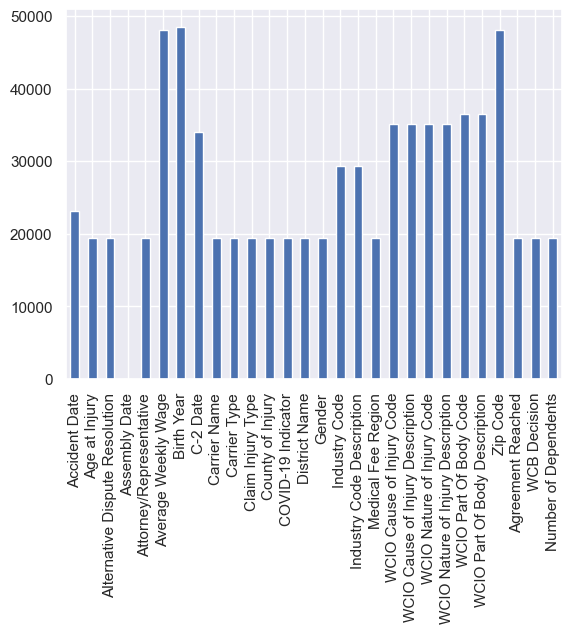

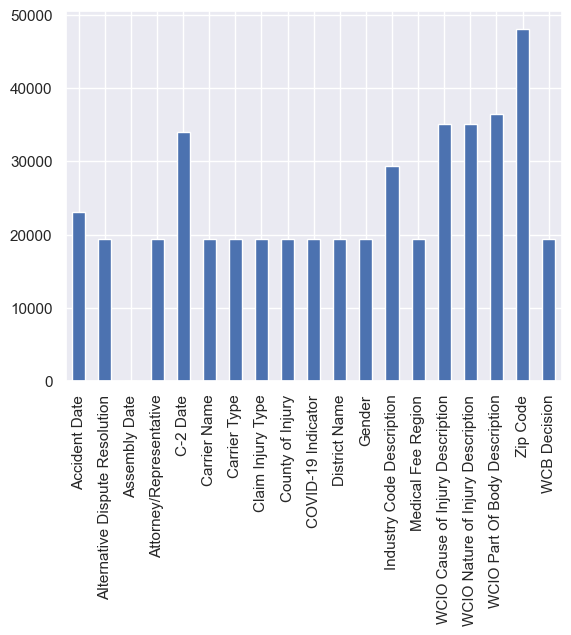

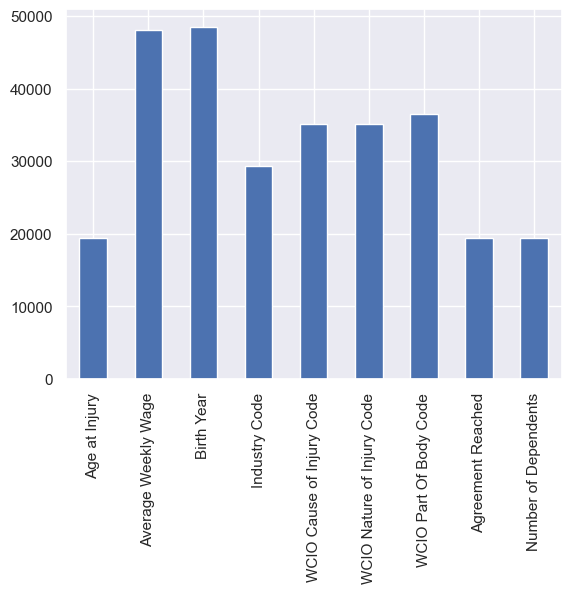

In [10]:
df_train.isna().sum().plot(kind = 'bar')
plt.show()
df_train_cat.isna().sum().plot(kind = 'bar')
plt.show()
df_train_num.isna().sum().plot(kind = 'bar')

plt.show()

In [11]:
#Fills the categorical NA values into a string 'Unknown'
df_cat_complete = df_train_cat.fillna('Unknown')
df_cat_complete.head(3)

,Accident Date,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,C-2 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,Gender,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Description,WCIO Nature of Injury Description,WCIO Part Of Body Description,Zip Code,WCB Decision
Claim Identifier,,,,,,,,,,,,,,,,,,,
5393875,2019-12-30,N,2020-01-01,N,2019-12-31,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,2. NON-COMP,ST. LAWRENCE,N,SYRACUSE,M,RETAIL TRADE,I,FROM LIQUID OR GREASE SPILLS,CONTUSION,BUTTOCKS,13662,Not Work Related
5393091,2019-08-30,N,2020-01-01,Y,2020-01-01,ZURICH AMERICAN INSURANCE CO,1A. PRIVATE,4. TEMPORARY,WYOMING,N,ROCHESTER,F,CONSTRUCTION,I,REPETITIVE MOTION,SPRAIN OR TEAR,SHOULDER(S),14569,Not Work Related
5393889,2019-12-06,N,2020-01-01,N,2020-01-01,INDEMNITY INSURANCE CO OF,1A. PRIVATE,4. TEMPORARY,ORANGE,N,ALBANY,M,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,II,OBJECT BEING LIFTED OR HANDLED,CONCUSSION,MULTIPLE HEAD INJURY,12589,Not Work Related


In [4]:
#Fills the numerical values with the column mean
df_num_complete = df_train_num.fillna(df_train_num.mean())
df_num_complete.head(10)

NameError: name 'df_train_num' is not defined

In [13]:
df_train_complete = pd.merge(df_num_complete, df_cat_complete, how = 'left', on = 'Claim Identifier')
df_train_complete

,Age at Injury,Average Weekly Wage,Birth Year,Industry Code,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Agreement Reached,Number of Dependents,Accident Date,...,COVID-19 Indicator,District Name,Gender,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Description,WCIO Nature of Injury Description,WCIO Part Of Body Description,Zip Code,WCB Decision
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
5393875,31.00000,0.000000,1988.000000,44.000000,27.000000,10.000000,62.000000,0.000000,1.000000,2019-12-30,...,N,SYRACUSE,M,RETAIL TRADE,I,FROM LIQUID OR GREASE SPILLS,CONTUSION,BUTTOCKS,13662,Not Work Related
5393091,46.00000,1745.930000,1973.000000,23.000000,97.000000,49.000000,38.000000,1.000000,4.000000,2019-08-30,...,N,ROCHESTER,F,CONSTRUCTION,I,REPETITIVE MOTION,SPRAIN OR TEAR,SHOULDER(S),14569,Not Work Related
5393889,40.00000,1434.800000,1979.000000,56.000000,79.000000,7.000000,10.000000,0.000000,6.000000,2019-12-06,...,N,ALBANY,M,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,II,OBJECT BEING LIFTED OR HANDLED,CONCUSSION,MULTIPLE HEAD INJURY,12589,Not Work Related
957648180,42.11427,491.088321,1886.767604,58.645305,54.381143,41.013839,39.738146,0.046665,3.006559,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
5393887,61.00000,491.088321,1958.000000,62.000000,16.000000,43.000000,36.000000,0.000000,1.000000,2019-12-30,...,N,ALBANY,M,HEALTH CARE AND SOCIAL ASSISTANCE,II,"HAND TOOL, UTENSIL; NOT POWERED",PUNCTURE,FINGER(S),12603,Not Work Related
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327160035,42.11427,491.088321,1886.767604,58.645305,54.381143,41.013839,39.738146,0.046665,3.006559,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
6165075,72.00000,0.000000,1950.000000,48.000000,25.000000,90.000000,-9.000000,0.000000,3.000000,2022-12-13,...,N,BINGHAMTON,F,TRANSPORTATION AND WAREHOUSING,I,FROM DIFFERENT LEVEL (ELEVATION),MULTIPLE PHYSICAL INJURIES ONLY,MULTIPLE,12779,Not Work Related
249875936,42.11427,491.088321,1886.767604,58.645305,54.381143,41.013839,39.738146,0.046665,3.006559,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown


In [14]:
X = df_train_complete.drop('Claim Injury Type', axis = 1)
y = df_train_complete['Claim Injury Type']

In [15]:
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.3, 
                                                  random_state = 0, 
                                                  stratify = y, 
                                                  shuffle = True)

In [16]:
X_train_num = X_train.select_dtypes(include=np.number).set_index(X_train.index)

X_train_cat = X_train.select_dtypes(exclude=np.number).set_index(X_train.index)


In [17]:
#imported here for demonstrative purposes but it is a good practice to import everything at the start.
from sklearn.preprocessing import MinMaxScaler

#call function
scaler = MinMaxScaler()

#fit to training data
scaler.fit(X_train_num)

#transform the data
X_train_num_scaled = scaler.transform(X_train_num) # this will return an array

#show results
X_train_num_scaled

array([[2.90598291e-01, 0.00000000e+00, 9.84638256e-01, ...,
        0.00000000e+00, 0.00000000e+00, 3.33333333e-01],
       [4.27350427e-01, 8.61397955e-05, 9.76709613e-01, ...,
        4.62962963e-01, 0.00000000e+00, 8.33333333e-01],
       [2.39316239e-01, 5.46270246e-04, 9.87611497e-01, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       ...,
       [2.64957265e-01, 6.54283413e-04, 9.86124876e-01, ...,
        4.81481481e-01, 0.00000000e+00, 1.66666667e-01],
       [2.90598291e-01, 0.00000000e+00, 0.00000000e+00, ...,
        3.79629630e-01, 0.00000000e+00, 0.00000000e+00],
       [1.70940171e-01, 0.00000000e+00, 9.92071358e-01, ...,
        4.35185185e-01, 0.00000000e+00, 3.33333333e-01]])

In [18]:
# Convert the array to a pandas dataframe
X_train_num_scaled = pd.DataFrame(X_train_num_scaled, columns = X_train_num.columns).set_index(X_train.index)
X_train_num_scaled

,Age at Injury,Average Weekly Wage,Birth Year,Industry Code,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Agreement Reached,Number of Dependents
Claim Identifier,,,,,,,,,
5921484,0.290598,0.000000,0.984638,0.555556,1.000000,0.533333,0.000000,0.000000,0.333333
5796905,0.427350,0.000086,0.976710,0.753086,0.561224,0.566667,0.462963,0.000000,0.833333
5806142,0.239316,0.000546,0.987611,1.000000,0.897959,0.100000,0.000000,0.000000,1.000000
640983192,0.359951,0.000185,0.934969,0.588214,0.544706,0.444598,0.451279,0.046665,0.501093
5889759,0.299145,0.000261,0.984143,0.407407,0.816327,0.433333,0.250000,0.000000,0.500000
...,...,...,...,...,...,...,...,...,...
5442858,0.282051,0.000000,0.984638,0.617284,0.755102,0.433333,0.185185,0.000000,1.000000
5559638,0.162393,0.000000,0.991576,0.271605,0.908163,0.533333,0.574074,0.000000,0.333333
5831672,0.264957,0.000654,0.986125,0.148148,0.091837,0.166667,0.481481,0.000000,0.166667


In [19]:
#Start of Feature Selection

In [20]:
#If there is variances equal to zero we should drop them
X_train_num_scaled.var()

#Observations -> Average Weekly Wage should be dropped?? variance really close to zero

Age at Injury                 0.014371
Average Weekly Wage           0.000004
Birth Year                    0.038715
Industry Code                 0.056001
WCIO Cause of Injury Code     0.065622
WCIO Nature of Injury Code    0.057240
WCIO Part Of Body Code        0.040282
Agreement Reached             0.043237
Number of Dependents          0.107638
dtype: float64

In [21]:
#Starting to do some correlations
def cor_heatmap(cor):
    plt.figure(figsize=(12,10))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Reds, fmt='.1')
    plt.show()

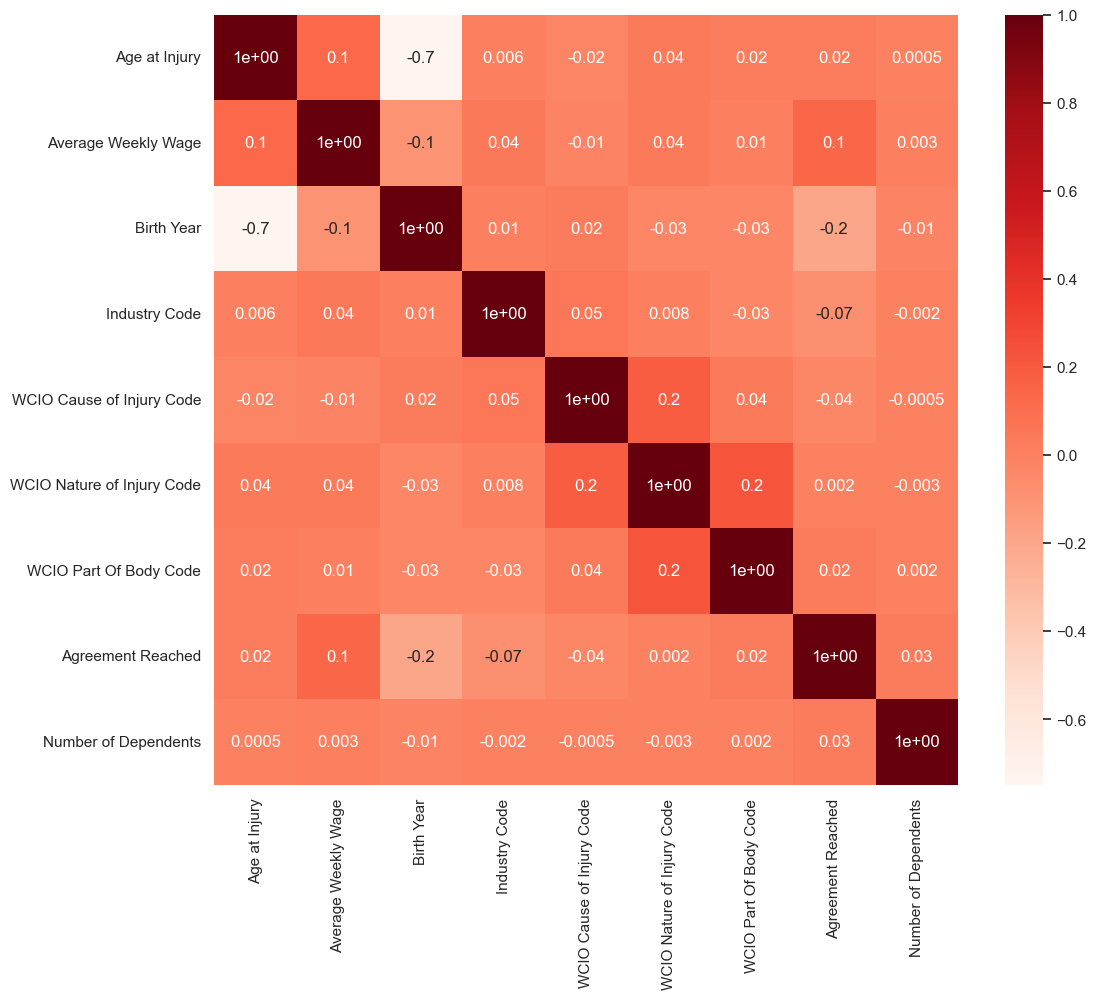

In [22]:
cor_spearman = X_train_num_scaled.corr(method ='spearman')
cor_spearman

#Trying the heatmap
cor_heatmap(cor_spearman)
#Only birth year and age of injury are correlated